In [1]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout,execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


In [2]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [3]:
random_runs = [
    'kobybibas/pnml_for_active_learning/3nc3n8a3',
    'kobybibas/pnml_for_active_learning/131bwfu2',
    'kobybibas/pnml_for_active_learning/2ohb43jt',
    'kobybibas/pnml_for_active_learning/2975rh6s',
    'kobybibas/pnml_for_active_learning/32mfxc81',
    'kobybibas/pnml_for_active_learning/9mexzbcu'
]
bald_runs = [
    'kobybibas/pnml_for_active_learning/k17fre6d',
    'kobybibas/pnml_for_active_learning/euqwcz6s',
    'kobybibas/pnml_for_active_learning/1ylztlce',
    'kobybibas/pnml_for_active_learning/3bh0tlcm',
    'kobybibas/pnml_for_active_learning/3ompobye',
    'kobybibas/pnml_for_active_learning/2n7jwxic'
]

kmean_runs =[
    'kobybibas/pnml_for_active_learning/uooyp58m',
    'kobybibas/pnml_for_active_learning/ptyiq2cb',
    'kobybibas/pnml_for_active_learning/jqmukw4a',
    'kobybibas/pnml_for_active_learning/2vmj3i26',
    'kobybibas/pnml_for_active_learning/1qyws58i',
    'kobybibas/pnml_for_active_learning/1dqp2aks'
]

epig_runs =[
'kobybibas/pnml_for_active_learning/1ydqpys2',
'kobybibas/pnml_for_active_learning/1s0moerw',
'kobybibas/pnml_for_active_learning/azet3ezh',
'kobybibas/pnml_for_active_learning/bq9dcbzs',
'kobybibas/pnml_for_active_learning/mfx7y6pj',
'kobybibas/pnml_for_active_learning/26m5saxv'
]

pnml_runs = [
    'kobybibas/pnml_for_active_learning/2errapxe',
    'kobybibas/pnml_for_active_learning/h79c694h',
    'kobybibas/pnml_for_active_learning/cumcwe1e',
    'kobybibas/pnml_for_active_learning/384vr9bn',
    'kobybibas/pnml_for_active_learning/2yopyl79',
    'kobybibas/pnml_for_active_learning/kfw7xxcp'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
kmean_dfs = process_results(api=api, run_list=kmean_runs)
epig_dfs = process_results(api=api, run_list=epig_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/3nc3n8a3
kobybibas/pnml_for_active_learning/131bwfu2
kobybibas/pnml_for_active_learning/2ohb43jt
kobybibas/pnml_for_active_learning/2975rh6s
kobybibas/pnml_for_active_learning/32mfxc81
kobybibas/pnml_for_active_learning/9mexzbcu
kobybibas/pnml_for_active_learning/k17fre6d
kobybibas/pnml_for_active_learning/euqwcz6s
kobybibas/pnml_for_active_learning/1ylztlce
kobybibas/pnml_for_active_learning/3bh0tlcm
kobybibas/pnml_for_active_learning/3ompobye
kobybibas/pnml_for_active_learning/2n7jwxic
kobybibas/pnml_for_active_learning/uooyp58m
kobybibas/pnml_for_active_learning/ptyiq2cb
kobybibas/pnml_for_active_learning/jqmukw4a
kobybibas/pnml_for_active_learning/2vmj3i26
kobybibas/pnml_for_active_learning/1qyws58i
kobybibas/pnml_for_active_learning/1dqp2aks
kobybibas/pnml_for_active_learning/1ydqpys2
kobybibas/pnml_for_active_learning/1s0moerw
kobybibas/pnml_for_active_learning/azet3ezh
kobybibas/pnml_for_active_learning/bq9dcbzs
kobybibas/pnml_for_active_learni

In [4]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
kmean_res = execute_df_rollout(kmean_dfs, rolling_size=rolling_size)
epig_res = execute_df_rollout(epig_dfs, rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (epig_res, "EPIG"),
    (pnml_res, "DIAL"),
]


In [5]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)

91.71597633136095
training_set_size_left     310.000000
test_acc_left                0.559930
test_acc_round               0.560000
training_set_size_right    338.000000
test_acc_right               0.559608
Name: 261, dtype: float64


Random
Bald
Core-set
EPIG
DIAL
EMNIST


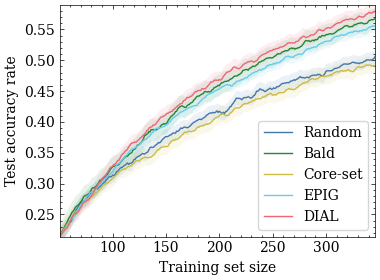

In [6]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig,ax = execute_plot(plot_list,fig,ax)
print("EMNIST")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "emnist.pdf"))
plt.show()